# Proyecto Mineria de datos y paradigma del big data

###### El plástico, ese gran invento que ha mejorado nuestra calidad de vida desde su invension hace 150 años, se ha convertido en una amenaza que pone en jaque la sostenibilidad del planeta. Su omnipresencia nos obliga a refñlexionar sobre la necesidad de un consumo responsable, en el que la educacion de la ciudadania desempeña un papel crucial. 

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


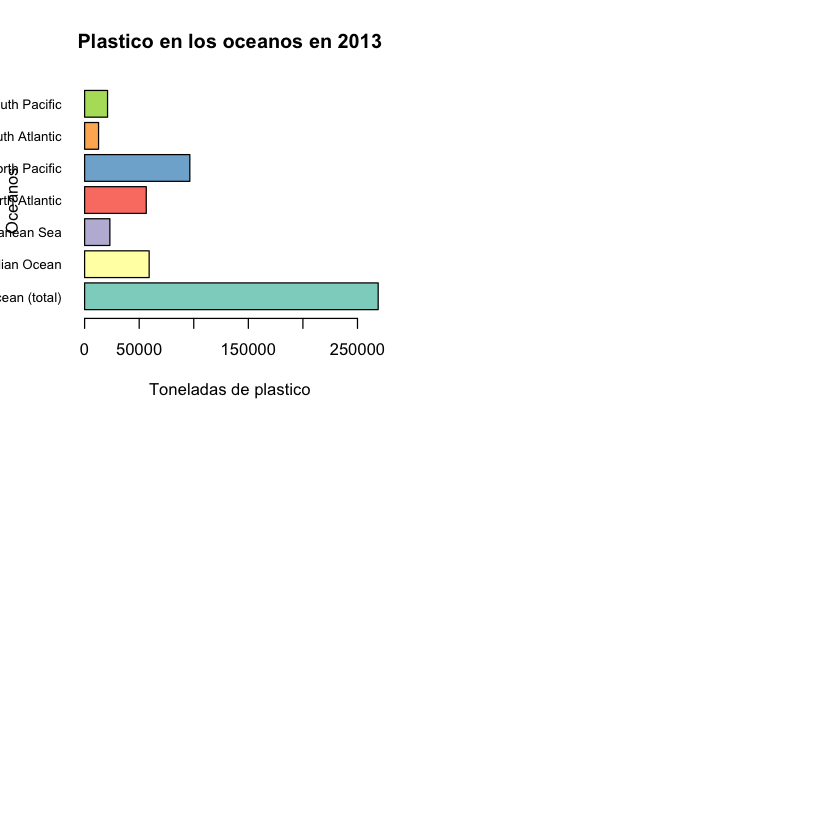

In [61]:
library(dplyr)
library(ggplot2)
library(scales)
install.packages("xts") # You also need to install the xts package
library(xts)
install.packages("broom") # And the broom package
library(broom)
library(RColorBrewer)

gpp<-read.csv('global-plastics-production.csv',header=TRUE,sep="," , quote="\"",dec=".",fill=TRUE)
sch<-read.csv('mean-years-of-schooling-selected-countries.csv',header=TRUE,sep="," , quote="\"",dec=".",fill=TRUE)
pmw<-read.csv('per-capita-mismanaged-plastic-waste-vs-gdp-per-capita.csv',header=TRUE,sep="," , quote="\"",dec=".",fill=TRUE,na.strings="0", as.is=T)
pmo<-read.csv('surface-plastic-mass-by-ocean.csv',header=TRUE,sep="," , quote="\"",dec=".",fill=TRUE)

pmo$Code <- NULL
gpp$Entity <- NULL
gpp$Code <- NULL
pmw$Entity <- NULL
pmw$Code <- NULL

layout(matrix(1:4,2,2,byrow = T))

# Masa de plastico en los oceanos  en 2013 ( pmo )
colnames(pmo) <- c("Oceanos", "Year", "Tamaño(toneladas)")
barplot(pmo$`Tamaño(toneladas)`, main="Plastico en los oceanos en 2013", horiz=TRUE, xlab = "Toneladas de plastico",
        ylab = "Oceanos",col=brewer.pal(n = 7, name = "Set3"),  names.arg=pmo$Oceanos, las=1, cex.names=0.8, )



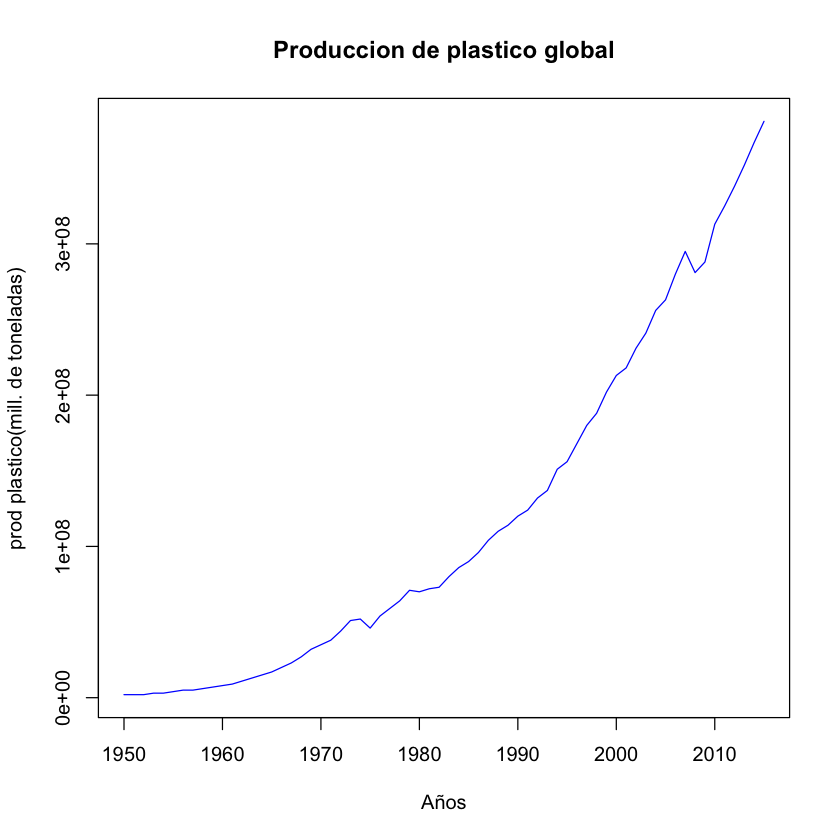

In [82]:
#Produccion de plastico global 
colnames(gpp) <- c("Year", "Prod de plastico global")
plot(gpp$Year, gpp$`Prod de plastico global`, main="Produccion de plastico global",
    xlab = "Años", ylab="prod plastico(mill. de toneladas)", type="l", col="blue")

Entity,Code,Year,Total_YearsSchool...Lee.Lee..2016...years.
Afghanistan,AFG,1870,0.01
Afghanistan,AFG,1875,0.01
Afghanistan,AFG,1880,0.01
Afghanistan,AFG,1885,0.01
Afghanistan,AFG,1890,0.01
Afghanistan,AFG,1895,0.01


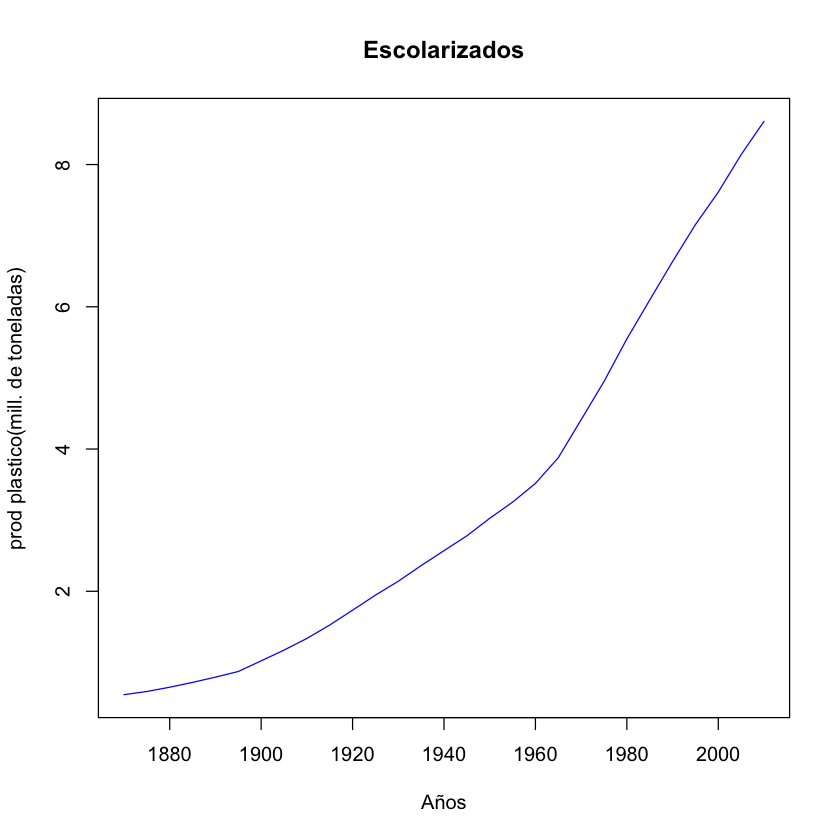

In [83]:
schmean<-aggregate.data.frame(sch$Total_YearsSchool...Lee.Lee..2016...years.,list(sch$Year), FUN=mean)
head(sch)
colnames(schmean) <- c("Year", "mean escalorizados")
plot(schmean$Year, schmean$`mean escalorizados`, main="Escolarizados",
     xlab = "Años", ylab="prod plastico(mill. de toneladas)", type="l", col="blue")


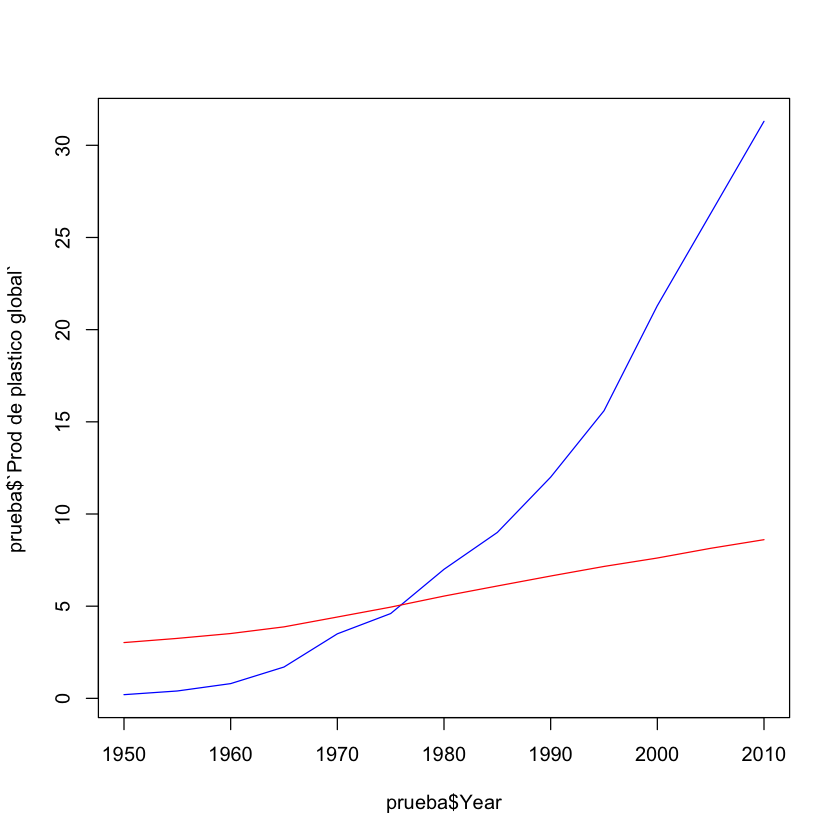

In [84]:
prueba <- merge(gpp, schmean, by.y="Year", sort = TRUE)
prueba$`Prod de plastico global` <- prueba$`Prod de plastico global` / 10000000

plot(prueba$Year,prueba$`Prod de plastico global`,type="l",col="blue")
lines(prueba$Year,prueba$`mean escalorizados`,col="red")


Year,Prod de plastico global,mean escalorizados
1950,0.2,3.026036
1955,0.4,3.253243
1960,0.8,3.516486
1965,1.7,3.878198
1970,3.5,4.411892
1975,4.6,4.949279
1980,7.0,5.547838
1985,9.0,6.095315
1990,12.0,6.636126
1995,15.6,7.155495


[1] "Year"                    "Prod de plastico global"
[3] "mean escalorizados"

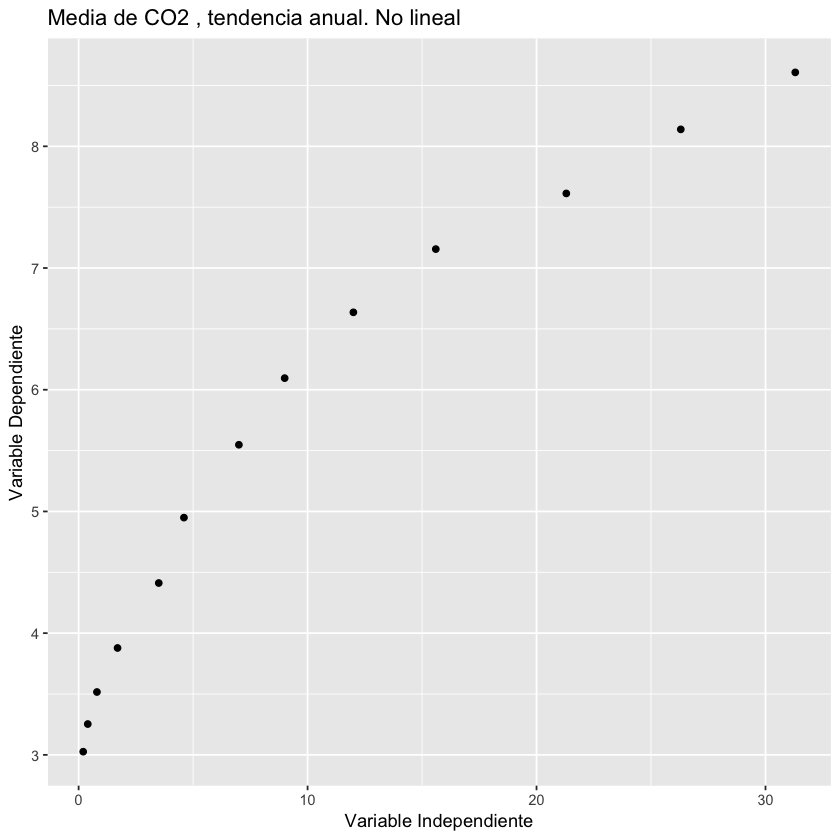

In [85]:
prueba
colnames(prueba)
ggplot() + geom_point(data = prueba, aes(x = prueba$'Prod de plastico global', y = prueba$'mean escalorizados')) + 
  xlab("Variable Independiente") + 
  ylab("Variable Dependiente") + 
  ggtitle("Media de CO2 , tendencia anual. No lineal")

In [86]:
library(caTools)
split = sample.split(prueba$'mean escalorizados', SplitRatio = 0.7)
nltrain = subset(prueba, split == TRUE)
nltest = subset(prueba, split == FALSE)

In [87]:
nltrain$x2 <- nltrain$'Prod de plastico global'^2
str(nltrain)

'data.frame':	9 obs. of  4 variables:
 $ Year                   : int  1950 1955 1960 1965 1980 1985 1995 2005 2010
 $ Prod de plastico global: num  0.2 0.4 0.8 1.7 7 9 15.6 26.3 31.3
 $ mean escalorizados     : num  3.03 3.25 3.52 3.88 5.55 ...
 $ x2                     : num  0.04 0.16 0.64 2.89 49 ...


In [88]:
set.seed(1234)
regresion_poly <- lm(nltrain$'mean escalorizados' ~ nltrain$'Prod de plastico global' + x2, data = nltrain)

In [89]:
summary(regresion_poly)



Call:
lm(formula = nltrain$"mean escalorizados" ~ nltrain$"Prod de plastico global" + 
    x2, data = nltrain)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.24968 -0.13726  0.05391  0.15381  0.18758 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)                        3.1790209  0.1085488  29.287 1.05e-07 ***
nltrain$"Prod de plastico global"  0.3593486  0.0235445  15.263 5.00e-06 ***
x2                                -0.0061313  0.0007663  -8.001 0.000203 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2005 on 6 degrees of freedom
Multiple R-squared:  0.9936,	Adjusted R-squared:  0.9914 
F-statistic: 462.6 on 2 and 6 DF,  p-value: 2.676e-07


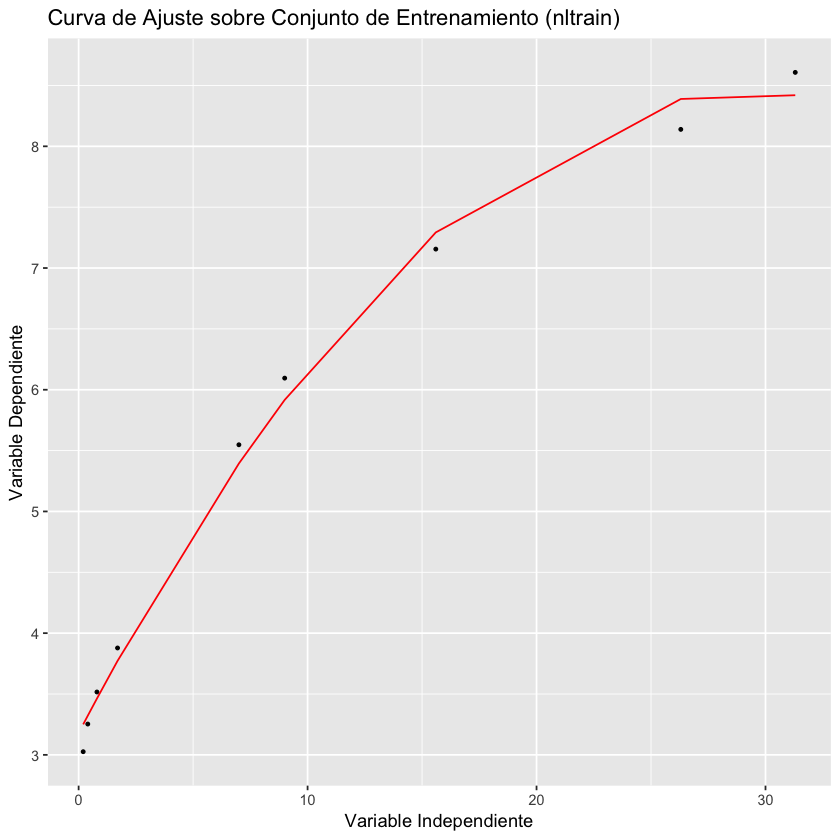

In [90]:
y_poly_predict <- predict(regresion_poly, nltrain)
ggplot() + geom_point(data = nltrain, aes(x = nltrain$'Prod de plastico global', y = nltrain$'mean escalorizados'), size = 0.7) + 
  geom_line(aes( x = nltrain$'Prod de plastico global', y = y_poly_predict), color = "red") +
  xlab("Variable Independiente") + 
  ylab("Variable Dependiente") + 
  ggtitle("Curva de Ajuste sobre Conjunto de Entrenamiento (nltrain)")

In [91]:
nltrain$x3 <- nltrain$'Prod de plastico global'^3
regresion_poly <- lm(nltrain$'mean escalorizados' ~ nltrain$'Prod de plastico global' + x2 + x3, data = nltrain)
summary(regresion_poly)


Call:
lm(formula = nltrain$"mean escalorizados" ~ nltrain$"Prod de plastico global" + 
    x2 + x3, data = nltrain)

Residuals:
        1         2         3         4         7         8        10        12 
-0.132044  0.004082  0.089082  0.068440 -0.040289  0.017805 -0.018916  0.023315 
       13 
-0.011475 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)                        3.066e+00  4.842e-02  63.317 1.86e-08 ***
nltrain$"Prod de plastico global"  4.653e-01  2.116e-02  21.993 3.61e-06 ***
x2                                -1.667e-02  1.903e-03  -8.760 0.000321 ***
x3                                 2.387e-04  4.253e-05   5.613 0.002482 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0813 on 5 degrees of freedom
Multiple R-squared:  0.9991,	Adjusted R-squared:  0.9986 
F-statistic:  1887 on 3 and 5 DF,  p-value: 4.712e-08


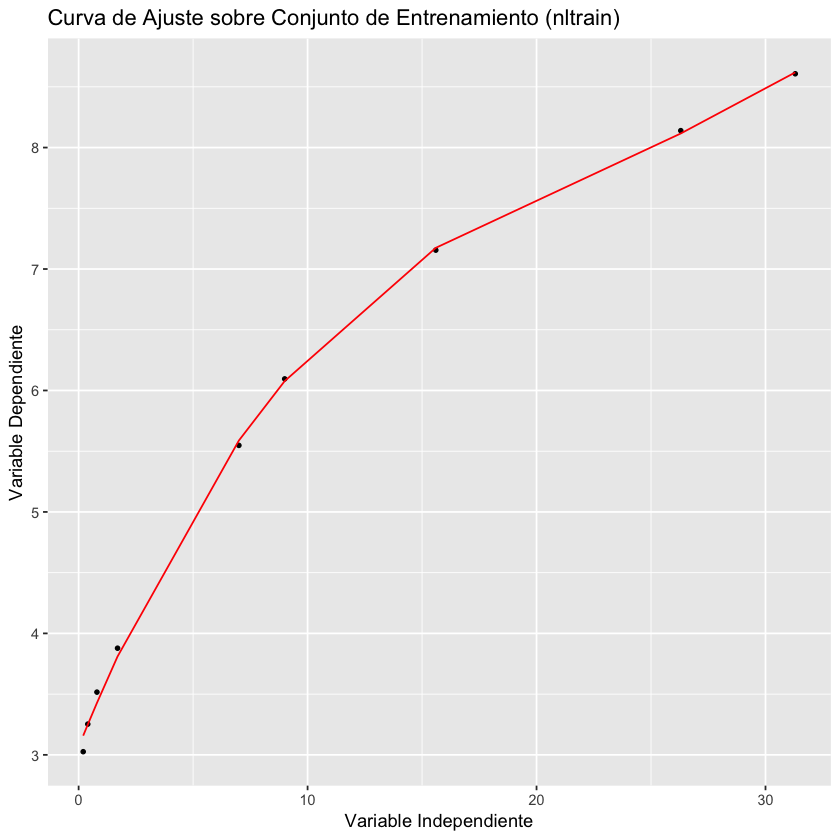

In [92]:
y_poly_predict <- predict(regresion_poly, nltrain)
ggplot() + 
geom_point(data = nltrain, aes(x = nltrain$'Prod de plastico global', y = nltrain$'mean escalorizados'), size = 0.9) + 
geom_line(aes( x = nltrain$'Prod de plastico global', y = y_poly_predict), color = "red") +
  xlab("Variable Independiente") + 
  ylab("Variable Dependiente") + 
  ggtitle("Curva de Ajuste sobre Conjunto de Entrenamiento (nltrain)")

In [94]:
nltest$x2 <- nltest$'Prod de plastico global'^2
nltest$x3 <- nltest$'Prod de plastico global'^3
y_poly_test_predict <- predict(regresion_poly, nltest)



Warning message:
“'newdata' had 4 rows but variables found have 9 rows”

ERROR: Error in model.frame.default(Terms, newdata, na.action = na.action, xlev = object$xlevels): variable lengths differ (found for 'x2')


In [ ]:
library("RColorBrewer")
library("ggplot2") 

library(dplyr)

pmw<-read.csv('/Users/agus/UCM/4º/MIN/proyecto/per-capita-mismanaged-plastic-waste-vs-gdp-per-capita.csv',header=TRUE,sep="," , quote="\"",dec=".",fill=TRUE,na.strings="0", as.is=T)
pFate<-read.csv('/Users/agus/UCM/4º/MIN/proyecto/global-plastic-fate.csv',header=TRUE,sep="," , quote="\"",dec=".",fill=TRUE,na.strings="0", as.is=T)



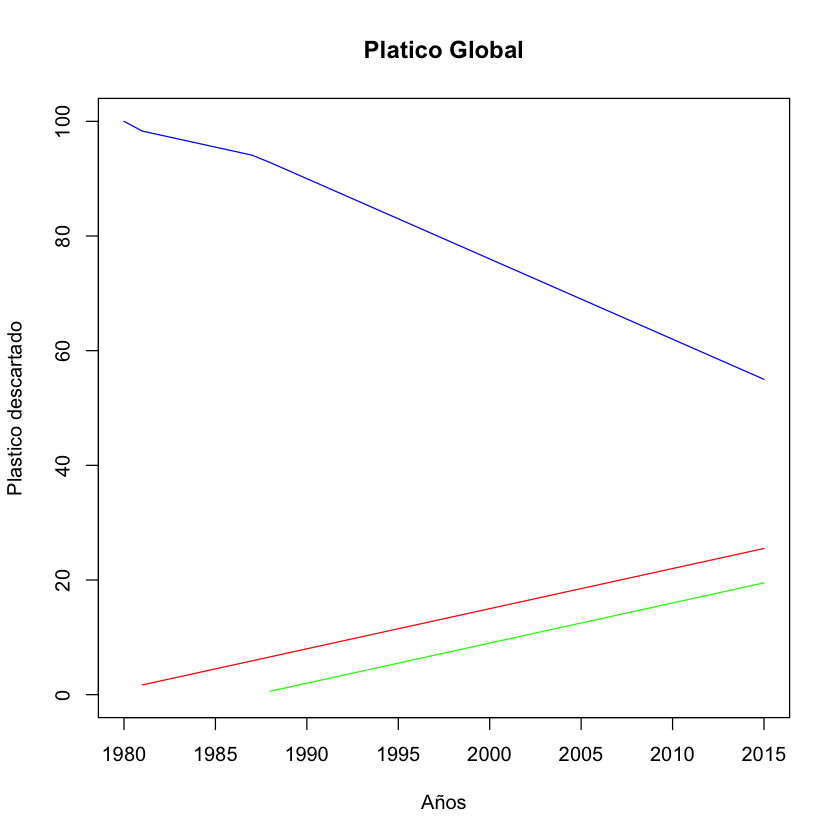

In [11]:
descartado <- pFate[c(1:36), ]
incinerado <- pFate[c(37:72), ]
reciclado <- pFate[c(73:108), ]

plot(descartado$Year,descartado$Estimated.historic.plastic.fate....,type='l', 
col="blue",xlab="Años",ylab="Plastico descartado",
main="Platico Global",ylim=c(0,100))
points(incinerado$Year, incinerado$Estimated.historic.plastic.fate...., type='l',
col="red")
points(reciclado$Year, reciclado$Estimated.historic.plastic.fate...., type='l',
col="green")